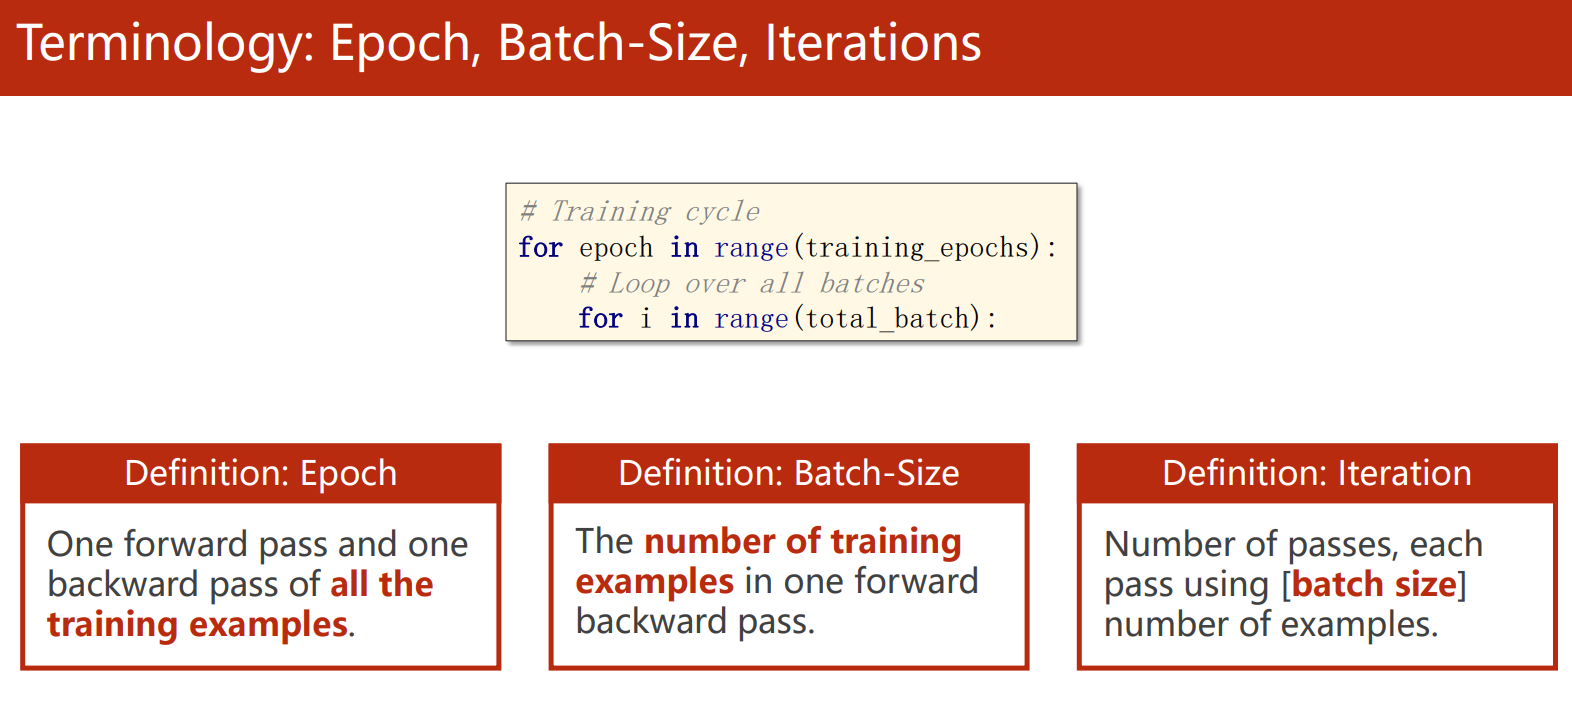
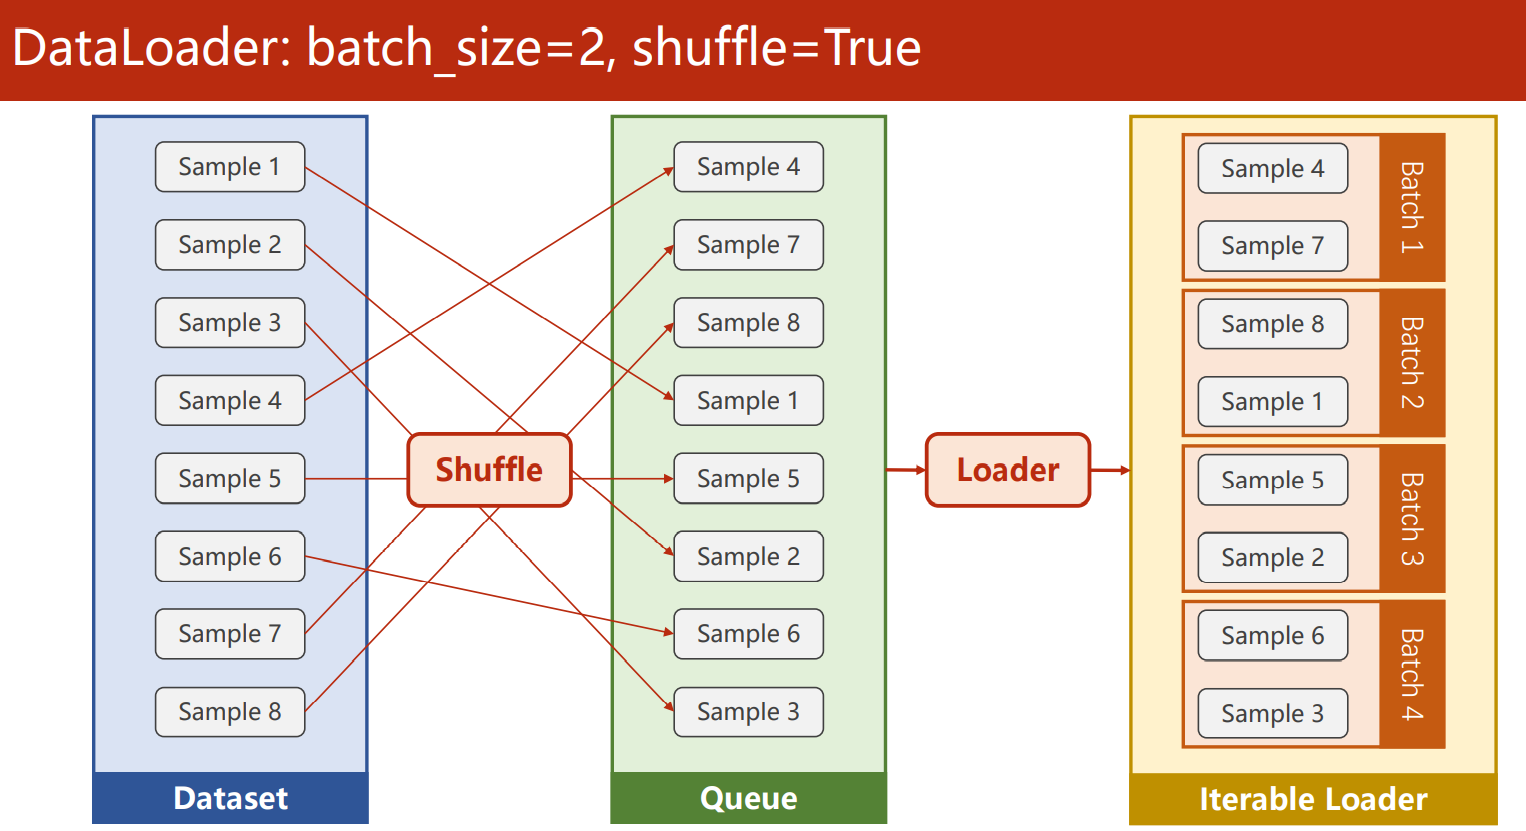

In [1]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [5]:
import numpy as np

In [6]:
class DiabetesDataset(Dataset):
    def __init__(self,filepath):
        xy = np.loadtxt(filepath,delimiter=',',dtype=np.float32)
        self.len = xy.shape[0]
        self.x_data=torch.from_numpy(xy[:,:-1])
        self.y_data= torch.from_numpy(xy[:,[-1]])
    def __getitem__(self,index):
        return self.x_data[index],self.y_data[index]
    def __len__(self):
        return self.len

In [7]:
dataset = DiabetesDataset("../diabetes.csv.gz")

In [11]:
dataset.__len__

<bound method DiabetesDataset.__len__ of <__main__.DiabetesDataset object at 0x0000023F4A0B0A20>>

In [23]:
train_loader = DataLoader(dataset=dataset,
                         batch_size=32,
                         shuffle=True,
                         num_workers=0)

In [24]:
train_loader

In [14]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.linear1 = torch.nn.Linear(8,6)
        self.linear2 = torch.nn.Linear(6,4)
        self.linear3 = torch.nn.Linear(4,1)
        self.activate = torch.nn.Sigmoid()
    
    def forward(self,x):
        x = self.activate(self.linear1(x))
        x = self.activate(self.linear2(x))
        x = self.activate(self.linear3(x))
        return x

In [15]:
model = Model()

In [16]:
criterion = torch.nn.BCELoss(size_average=True)

C:\Users\Administrator\Envs\py3.6.5_torch1.10\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [18]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [25]:
for epoch in range(100):
    for i,data in enumerate(train_loader,0):
        inputs,labels = data
        # forward
        y_pred = model(inputs)
        loss = criterion(y_pred,labels)
        print(epoch, i, loss.item())
        # backward
        optimizer.zero_grad()
        loss.backward()
        # update
        optimizer.step()

0 0 0.6868035197257996
0 1 0.7091703414916992
0 2 0.642180860042572
0 3 0.6195195913314819
0 4 0.6302894353866577
0 5 0.6642316579818726
0 6 0.6527156233787537
0 7 0.6410472393035889
0 8 0.6410996317863464
0 9 0.6059921979904175
0 10 0.663788378238678
0 11 0.6403019428253174
0 12 0.7108113765716553
0 13 0.6756355166435242
0 14 0.5935322046279907
0 15 0.6518465876579285
0 16 0.6517397165298462
0 17 0.639735221862793
0 18 0.6994684338569641
0 19 0.6755666732788086
0 20 0.6397786140441895
0 21 0.5674336552619934
0 22 0.6754856109619141
0 23 0.7205890417098999
1 0 0.6028909683227539
1 1 0.6632579565048218
1 2 0.6633779406547546
1 3 0.6632351875305176
1 4 0.6878210306167603
1 5 0.589687705039978
1 6 0.588762640953064
1 7 0.6255677938461304
1 8 0.7135372757911682
1 9 0.650597870349884
1 10 0.6253359913825989
1 11 0.6629912853240967
1 12 0.7008299827575684
1 13 0.6251415014266968
1 14 0.7009912133216858
1 15 0.7134841680526733
1 16 0.6504557728767395
1 17 0.650357186794281
1 18 0.599567592144